# Invasive Ductal Cancer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
X = np.load('../idc/data/X.npy')
y = np.load('../idc/data/Y.npy')

In [3]:
X.shape

(5547, 50, 50, 3)

In [4]:
y.shape

(5547,)

In [5]:
neg = X[y==0]
pos = X[y==1]

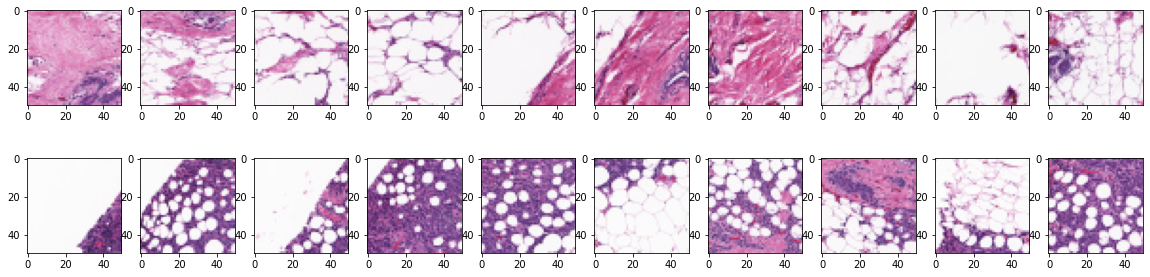

In [6]:
n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(neg[i])
    plt.subplot(2, n, n + i + 1)
    plt.imshow(pos[i])


In [ ]:
n=10
plt.figure(figsize=(20,5))
for i in range(n):
    plt.subplot(2,n,i+1)
    plt.imshow(neg[i+80])
    plt.subplot(2,n,n+i+1)
    plt.imshow(pos[i+80])

## Baseline CNN Model

In [7]:
X_scaled = X/255

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [9]:
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers

2021-11-22 13:35:27.757295: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-22 13:35:27.757342: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [10]:
# Complete model
model = models.Sequential()
model.add(layers.Conv2D(16, kernel_size=(2,2), input_shape=(50, 50, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid')) 

model.summary()

2021-11-22 13:35:30.798081: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-22 13:35:30.798135: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-22 13:35:30.798155: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-9D92CCC): /proc/driver/nvidia/version does not exist
2021-11-22 13:35:30.799290: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 49, 49, 16)        208       
_________________________________________________________________
flatten (Flatten)            (None, 38416)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 38417     
Total params: 38,625
Trainable params: 38,625
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          epochs=10,  # Use early stop in practice
          batch_size=32, 
          verbose=1)

2021-11-22 13:35:34.657320: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-22 13:35:34.659643: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2111995000 Hz


Epoch 1/10
130/130 [==============================] - 2s 8ms/step - loss: 0.6492 - accuracy: 0.6486
Epoch 2/10
130/130 [==============================] - 1s 8ms/step - loss: 0.5600 - accuracy: 0.7264
Epoch 3/10
130/130 [==============================] - 1s 8ms/step - loss: 0.5414 - accuracy: 0.7300
Epoch 4/10
130/130 [==============================] - 1s 8ms/step - loss: 0.5102 - accuracy: 0.7526
Epoch 5/10
130/130 [==============================] - 1s 8ms/step - loss: 0.4584 - accuracy: 0.8038
Epoch 6/10
130/130 [==============================] - 1s 8ms/step - loss: 0.4357 - accuracy: 0.8041
Epoch 7/10
130/130 [==============================] - 1s 8ms/step - loss: 0.4050 - accuracy: 0.8267
Epoch 8/10
130/130 [==============================] - 1s 8ms/step - loss: 0.3718 - accuracy: 0.8462
Epoch 9/10
130/130 [==============================] - 1s 8ms/step - loss: 0.3546 - accuracy: 0.8611
Epoch 10/10
130/130 [==============================] - 1s 10ms/step - loss: 0.3312 - accuracy: 0.872

In [16]:
y_pred = model.predict(X_test)

In [29]:
from keras.models import load_model

model.save('model_2.h5')

In [30]:
model2 = load_model('model_2.h5')

In [31]:
model2.predict(X_test)

array([[0.57571536],
       [0.6227339 ],
       [0.90055454],
       ...,
       [0.96236813],
       [0.2725674 ],
       [0.99617845]], dtype=float32)